### Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Interactive data visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot

### Prepare Environment

Read the csv file

In [4]:
# Loading the data
col_names = ['id', 'price', 'transfer_date', 'postcode', 'type', 'new', 'duration',
            'paon', 'saon', 'street', 'locality', 'city', 'district', 'county', 'ppd_cat', 'record_status']
pp18 = pd.read_csv("pp-2018-part1.csv", header=None, names=col_names)
pp19 = pd.read_csv("pp-2019-part1.csv", header=None, names=col_names)
df = pp18.append(pp19, ignore_index=True)
df.head(5)

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{68FEB20C-5A56-38DA-E053-6C04A8C051AE},212000,2018-02-26 00:00,L30 5RW,S,N,F,36,NaN,BROWNS LANE,NaN,BOOTLE,SEFTON,MERSEYSIDE,B,A
1,{68FEB20C-5A57-38DA-E053-6C04A8C051AE},56000,2018-02-09 00:00,L6 6BG,T,N,F,75,NaN,GILROY ROAD,NaN,LIVERPOOL,LIVERPOOL,MERSEYSIDE,B,A
2,{68FEB20C-5A58-38DA-E053-6C04A8C051AE},38750,2018-03-21 00:00,CH41 4HJ,T,N,F,5,NaN,TRINITY STREET,NaN,BIRKENHEAD,WIRRAL,MERSEYSIDE,B,A
3,{68FEB20C-5A59-38DA-E053-6C04A8C051AE},58000,2018-03-14 00:00,L8 9ST,T,N,F,6,NaN,DINGLE GROVE,NaN,LIVERPOOL,LIVERPOOL,MERSEYSIDE,B,A
4,{68FEB20C-5A5A-38DA-E053-6C04A8C051AE},98000,2018-02-01 00:00,CH49 9AL,T,N,F,1,NaN,KILN ROAD,NaN,WIRRAL,WIRRAL,MERSEYSIDE,B,A


### Converting "transfer_date" columns to datetime type year, month

In [6]:
# converting "transfer_date" columns to datetime type year, month

def date_to_day(df):
    df["transfer_date"] = pd.to_datetime(df["transfer_date"])
    df["year"] = df["transfer_date"].dt.year
    df["month"] = df["transfer_date"].dt.month
    df["lin_month"] = df["month"]
    df.loc[df["year"] == 2019, "lin_month"] = 12 + df.loc[df["year"] == 2019, "month"]
    return df

df = date_to_day(df)

As a part of sample date set we have 516906 records for 2018 and 501544 records for 2019 

In [7]:
# // record as per years
years = df.year.value_counts()
print(years)

2018    516906
2019    501544
Name: year, dtype: int64


### Exploratory analysis and visualization

Understanding data helper function

In [ ]:
# Generate horizontal bar charts
def verbar(data,pic=None,title=None):
    data = data.sort_values(axis=0,ascending=True)
    y=data.index.to_list()
    x=data

    if pic is None:
      fig,ax = plt.subplots(figsize=(15,10))
    else:
      fig,ax = plt.subplots(figsize=pic)
    
    if title is not None:
      ax.title.set_text(title)
      ax.set_title(title,fontsize=14)
    
    bars = ax.barh(y,x,0.5)

    for bar in bars:
      width = bar.get_width()
      label_y_pos = bar.get_y() + bar.get_height()/2
      ax.text(width,label_y_pos,s=f'{width}',va='center',fontsize=12)


# Calculate the percentage when you have total number at the last column

def calculate_percentage(df):
  new_df = df.copy()
  lens= new_df.columns.to_list()
  for i in range(len(lens)):
    new_df.iloc[:,i] = new_df.iloc[:,i]/new_df.iloc[:,-1]
  return new_df

# Calculate the total number of each row
def total_col(df):
  emp_list = []
  for i in range(len(df)):
    emp_list.append(df.iloc[i].sum())
  return emp_list

In [ ]:
df.columns

Index(['id', 'price', 'transfer_date', 'postcode', 'type', 'new', 'duration',
       'paon', 'saon', 'street', 'locality', 'city', 'district', 'county',
       'ppd_cat', 'record_status', 'year', 'month', 'lin_month'],
      dtype='object')

### One million eighteen thousand four hundred fifty records as a part sample datset

In [ ]:
#one million eighteen thousand four hundred fifty records as a part sample datset
df.shape

(1018450, 19)

In [ ]:
#Display the value types for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018450 entries, 0 to 1018449
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1018450 non-null  object        
 1   price          1018450 non-null  int64         
 2   transfer_date  1018450 non-null  datetime64[ns]
 3   postcode       1012916 non-null  object        
 4   type           1018450 non-null  object        
 5   new            1018450 non-null  object        
 6   duration       1018450 non-null  object        
 7   paon           1018450 non-null  object        
 8   saon           137467 non-null   object        
 9   street         999178 non-null   object        
 10  locality       388178 non-null   object        
 11  city           1018450 non-null  object        
 12  district       1018450 non-null  object        
 13  county         1018450 non-null  object        
 14  ppd_cat        1018450 non-null  o

In [ ]:
df.isnull().sum()

id                    0
price                 0
transfer_date         0
postcode           5534
type                  0
new                   0
duration              0
paon                  0
saon             880983
street            19272
locality         630272
city                  0
district              0
county                0
ppd_cat               0
record_status         0
year                  0
month                 0
lin_month             0
dtype: int64

### Let us capture all the nan values

In [ ]:
## Let us capture all the nan values
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

postcode: 0.0054% missing values
saon: 0.865% missing values
street: 0.0189% missing values
locality: 0.6189% missing values


## Price

In [ ]:
df.price.describe()

count    1.018450e+06
mean     3.503793e+05
std      1.673099e+06
min      1.000000e+00
25%      1.450000e+05
50%      2.300000e+05
75%      3.560000e+05
max      3.370000e+08
Name: price, dtype: float64

In [ ]:
## largest price values in the dataset
print(f'largest value:{sorted(df.price)[-1]}') 
print(f'2nd largest value:{sorted(df.price)[-2]}') 
print(f'3rd largest value:{sorted(df.price)[-3]}')

largest value:337000000
2nd largest value:315000000
3rd largest value:315000000


In [ ]:
## smallest price values in the dataset
print(f'last 5 minimum value:{sorted(df.price)[0:5]}')

last 5 minimum value:[1, 100, 100, 100, 100]


Mean price each year

In [ ]:
mean_both_year = df.price.mean()
mean_each_year = df.groupby('year')['price'].mean()

print(f'Mean price of all records: {mean_both_year}')
print(f'Mean price of each year: {mean_each_year}')

Mean price of all records: 350379.33465953165
Mean price of each year: year
2018    353793.939333
2019    346860.142638
Name: price, dtype: float64


Median price each year

In [ ]:
median_both_year = df.price.median()
median_each_year = df.groupby('year')['price'].median()

print(f'Median price of all records: {median_both_year}')
print(f'Median price of each year: {median_each_year}')

Median price of all records: 230000.0
Median price of each year: year
2018    229995.0
2019    230000.0
Name: price, dtype: float64


### Mean and median

When the distribution is skewed, the median is the form of 'average' that gives a better idea of any general tendency in the data. So, in this analysis we choose to mostly use the median.

C:\Users\ashit\AppData\Local\Temp/ipykernel_25652/1269500306.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



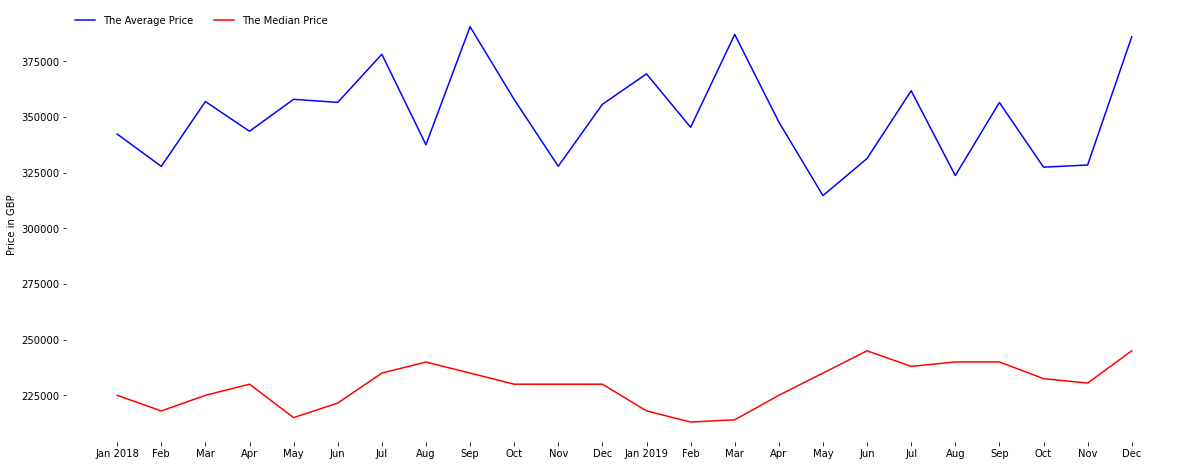

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 8))
price_mean = df.groupby("lin_month").price.mean() 
price_median = df.groupby("lin_month").price.median()
m = ['Jan 2018', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
'Jan 2019','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.plot(price_mean, "b-", label="The Average Price")
ax1.plot(price_median, "r-", label="The Median Price")
ax1.set_ylabel('Price in GBP')
ax1.set_xticklabels(m)
plt.xticks(price_mean.index)
ax1.legend(ncol=2, loc="upper left", frameon=False)
sns.despine(left=True, bottom=True)

The line chart of housing prices shows, Since 2018, the housing prices in the UK went up and reached the highest point in 2019. Next,

#### Price Distribution (exclude outliers)

The Price distribution is very skewed to the right, we need to exclude the big outliers to plot the price distribution.

C:\Users\ashit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



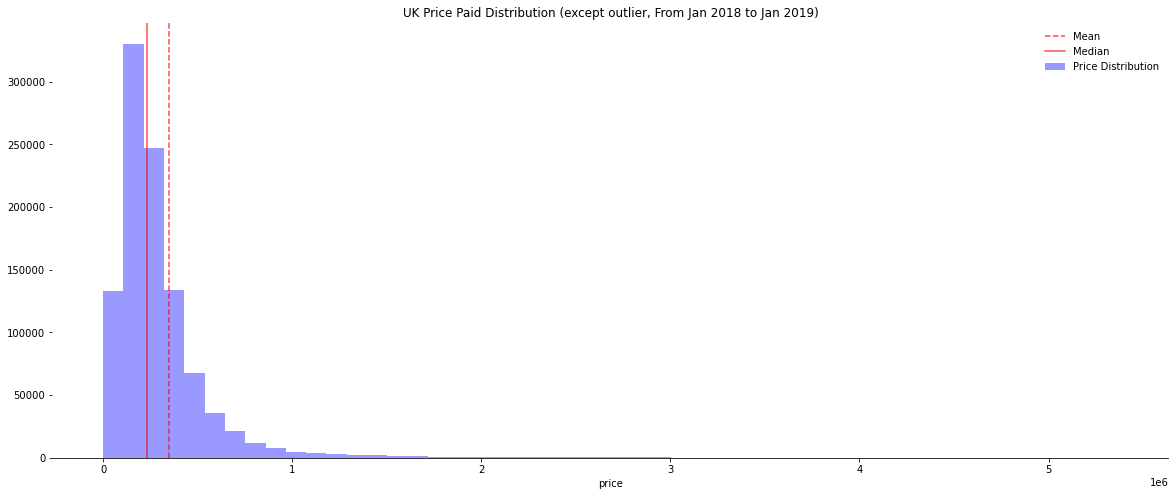

In [ ]:
# Price Distribution 
# Excluding the outlier
wo_outliers = df.loc[np.abs(df["price"] - df["price"].mean()) <= (3 * df["price"].std())]

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
ax.set(ylabel="", xlabel="Price (in GBP)", title="UK Price Paid Distribution (except outlier, From Jan 2018 to Jan 2019)")
sns.distplot(wo_outliers["price"], kde=False, color="b", label="Price Distribution")
ax.axvline(df.price.mean(), color='r', linestyle='--', label="Mean", alpha=0.7)
ax.axvline(df.price.median(), color='r', linestyle='-', label="Median", alpha=0.7)
ax.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True)

Outlier detection

In the financial world, outliers are inevitable. Asset prices are varying and fluctuating in the market. Some properties in London could be ridiculously expensive, whereas some in rural areas in the UK could be unbelievably cheap.

It is less accurate to represent housing prices with the mean price. we're analyzing the housing market in the whole UK. Some properties could be sold at very high prices in London, whereas some properties might be sold at 1 pound in Liverpool.

To detect outliers, we use the box plot using the random sampling technique. We look at the population by using this sampling technique as long as each sample has an equal chance to be picked up. By random sampling technique, we can roughly understand the shape of the whole dataset.

Outlier detection can help us identify houses that are listed with a price substantially below the market price. Meaning the houses which are lying in the Lower Bound: (Q1 - 1.5 * IQR).

Where Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1. Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3. And Inter-Quartile Range or IQR = Q3 - Q1.

In [ ]:
Q3 = df.price.quantile(.75)
Q1  = df.price.quantile(.25)

IQR = Q3 -  Q1 #Inter Quartile Range: (Q3-Q1 i.e. 75th - 25th)
Range = df.price.max() - df.price.min()
print(f'Q1:{Q1}')
print(f'Q3:{Q3}')
print(f'IQR:{IQR}')
print(f'Range:{Range}')

Q1:145000.0
Q3:356000.0
IQR:211000.0
Range:336999999


As we can see the screenshots, the statistics from 5% samples are as follows:

max = £337 million

min = £1

Q1 = £145k

Median = £230k

IQR = £211k

Q3 = £356k

What do these all mean?
After the random sampling, we aimed to grab a basic sense of the population for the dataset.

We know the maximum value is £337 million and the minimum value is £1. However, this doesn't mean there is only 1 data point for £337 million. Multiple house prices could be equal to £337 million.

Next, we know the third quartile is £337K. This means in the sample dataset, 75% of housing prices are below £337K. In contrast, the first quartile is £145K meaning 25% of housing prices is below £145k.

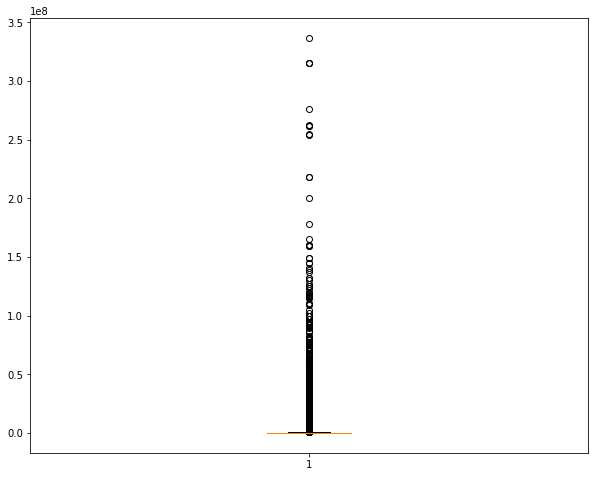

In [ ]:
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df.price,);

## Property Type

In the UK, 5 common types are shown in the slide. Since I'm not from here, I have done basic research about the dataset.

According to the description, we have 5 types as follows:

D = Detached

S = Semi-Detached

T = Terraced

F = Flats

O = Others

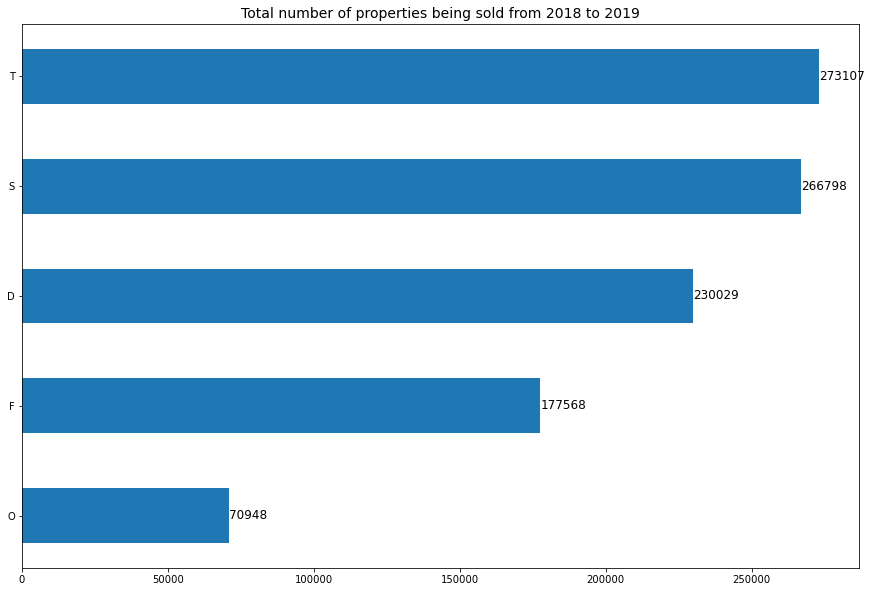

In [ ]:
property_types = df.type.value_counts()
verbar(property_types,title="Total number of properties being sold from 2018 to 2019")

In [ ]:
# // ratio of types of properties
def ratio(df):
    return df.value_counts()/len(df)
ratio_types = ratio(df.type)
ratio_types

T    0.268159
S    0.261965
D    0.225862
F    0.174351
O    0.069663
Name: type, dtype: float64

In [ ]:
def ratio(df):
    return df.value_counts()/len(df)

## Duration

Duration relates to tenure.

In the UK, freehold and leasehold are common types for tenure.

My understanding of the difference between freehold and leasehold is the portion of ownership. Freeholders own the land and the property built upon on the land completely, whereas leaseholders can be multiple and own a portion of right to use the property where they have to agree on certain action such as lending for the commerical use

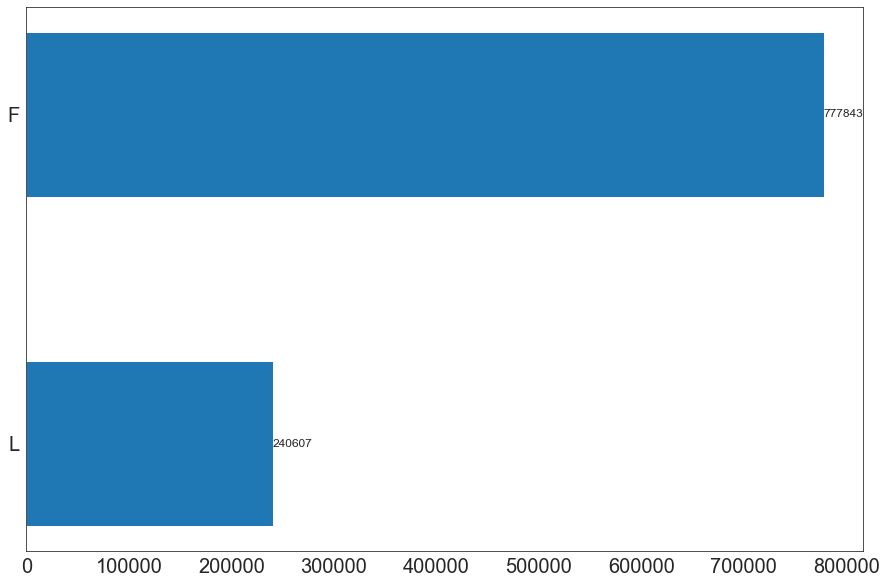

In [ ]:
duration_s = df.groupby('duration').duration.count()
verbar(duration_s)

In [ ]:
# // ratio of types of properties
def ratio(df):
    return df.value_counts()/len(df)
ratio_duration = ratio(df.duration)
ratio_duration


F    0.763752
L    0.236248
Name: duration, dtype: float64


### Old/New type

This category Old/New indicates the age of properties and applies to all paid price transactions, residential and non-residential.

However, we do not know specific properties' age in this dataset as we have no information about the definition of a property as old or new by the HM Land Registry.

-Y refers to a newly built property

-N refers to an established residential building

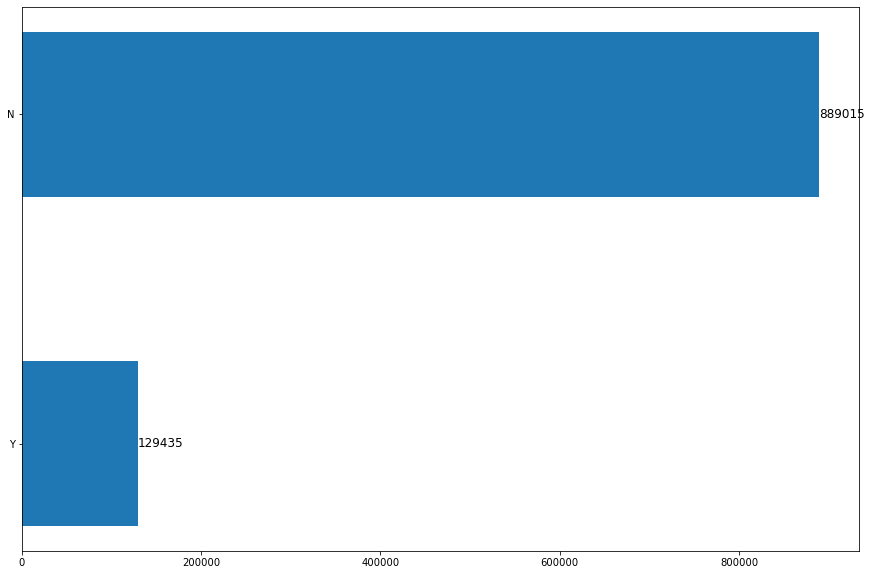

In [ ]:
oldnew_s = df['new'].value_counts()
oldnew_s

verbar(oldnew_s)

## PPDCategory Type

it does not demonstrate the importance of this category. The limited information is

PPD Category Type is the type of Price Paid Transaction

Having done some google, I found out the documentation on the UK GOV website

A = Standard Price Paid entry, includes single residential property sold for value.

B = Additional Price Paid entry including transfers under a power as follows:

sale/repossessions
buy-to-let (where they can be identified by *a Mortgage)
transfers to non-private individuals.
Note that category B does not separately identify the transaction types stated.

HM Land Registry has been collecting the information on Category A transactions from January 1995. Category B transactions were identified from October 2013.

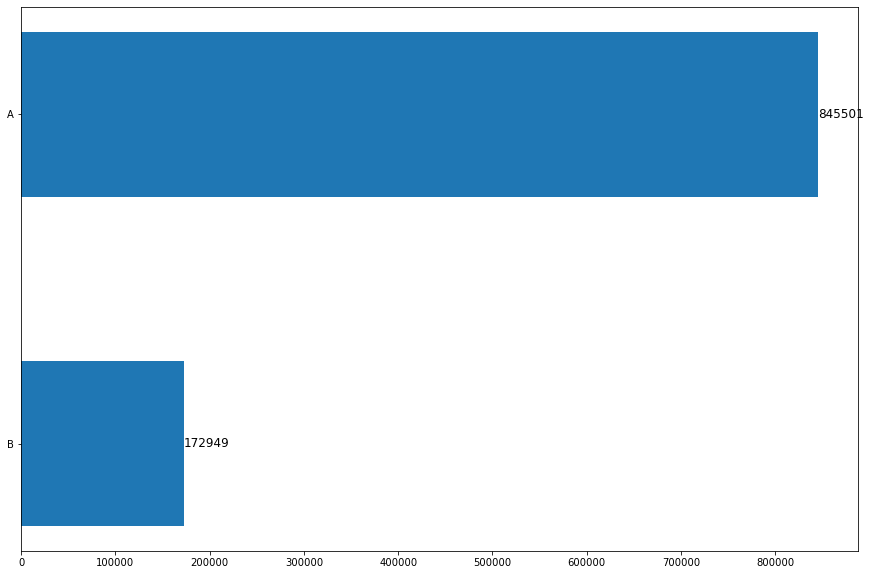

In [ ]:
PPDCategory_Type = df['ppd_cat'].value_counts()
PPDCategory_Type
verbar(PPDCategory_Type)

## Record Status

it demonstrates monthly files only Indicates additions, changes and deletions to the records. The categories are A, C, D
in my sample data set we have only A

A = Addition
C = Change
D = Delete
Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.

In [ ]:
Record_Status = df['record_status'].value_counts()
Record_Status

A    1018450
Name: record_status, dtype: int64

### What’s the total number of houses in the UK being sold since 2018 till 2019

In [ ]:
# Sum all data 
total_housesold = df['city'].value_counts().sum()

print("The total number of properties being sold is {}m + from 2018 to 2019".format(int(total_housesold/1e6)))

The total number of properties being sold is 1m + from 2018 to 2019


### Number of cities

In [ ]:
number_of_city = df['city'].nunique()
print('Number of cities:',number_of_city)

Number of cities: 1146


What're the top 10 cities regarding the house sales from 2018 to 2019

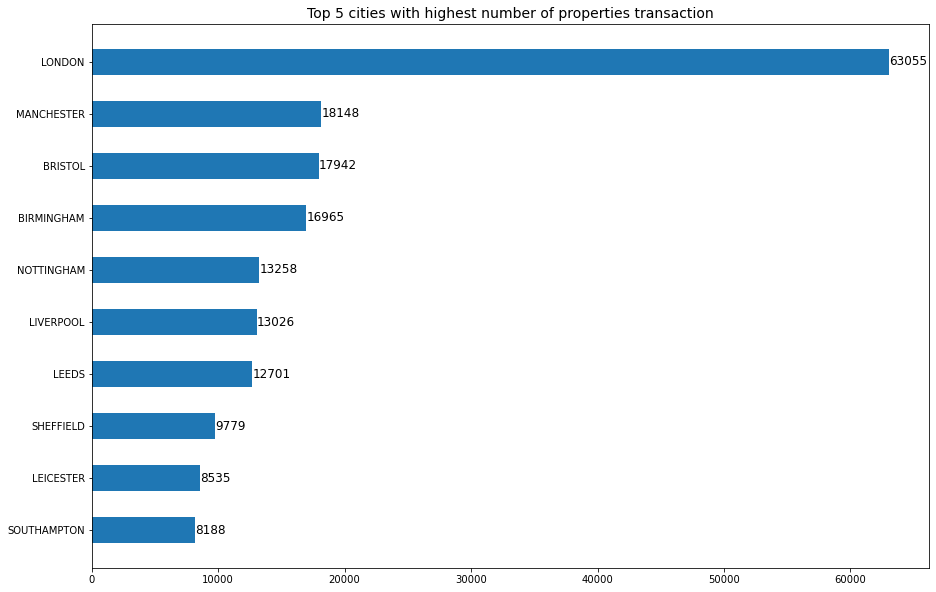

In [ ]:
# // top city with highest number of hight number of properties transaction

def top_city(df):
  city_count = df.groupby('city').city.count()
  city_count = city_count.sort_values(ascending=False)
  return city_count.head(10)
top_city = top_city(df)
verbar(top_city, title="Top 5 cities with highest number of properties transaction")


As shown in the picture, the house being sold the most is in London.

Besides London, there were cities like Manchester, Bristol and Birmingham following with London. I can't really know by just looking at the dataset I have. It could be policies that attracting migration or cheaper expenses of living.  Another interesting point is out of the top 10 cities, 5 places are in the North of England, i.e. Nottingham, Leeds, 
Liverpool, Sheffield, Leicester. I'm intrigued to know the population growth over years in these places.

Top 5 

London = South of England,

MANCHESTER = North West England

BRISTOL  = South West England 

BIRMINGHAM = West Midlands

NOTTINGHAM = Northern

Number of recorded transactions major town's like London, Manchester,Bristol and Birmingham

In [ ]:
print("Recorded transactions in London:", df[df['city'] == 'LONDON']['price'].count())
print("Recorded transactions in Manchester:", df[df['city'] == 'MANCHESTER']['price'].count())
print("Recorded transactions in Bristol:", df[df['city'] == 'BRISTOL']['price'].count())
print("Recorded transactions in Birmingham:", df[df['city'] == 'BIRMINGHAM']['price'].count())
print("Recorded transactions in Nottingham:", df[df['city'] == 'NOTTINGHAM']['price'].count())


Recorded transactions in London: 63055
Recorded transactions in Manchester: 18148
Recorded transactions in Bristol: 17942
Recorded transactions in Birmingham: 16965
Recorded transactions in Nottingham: 13258


Seggrate four cities from dataset and marged 

In [ ]:
London_df = df[df['city'] == 'LONDON'].copy()
Manchester_df = df[df['city'] == 'MANCHESTER'].copy()
Bristol_df = df[df['city'] == 'BRISTOL'].copy()
Birmingham_df = df[df['city'] == 'BIRMINGHAM'].copy()
Nottingham_df = df[df['city'] == 'NOTTINGHAM'].copy()
# df18 = df[df['year'] == 2018].copy()
# df18
merged_cities_df = pd.concat([London_df, Manchester_df, Bristol_df,Birmingham_df,Nottingham_df])

### What’s the most popular type of houses id being sold between 2018 and 2019 in London

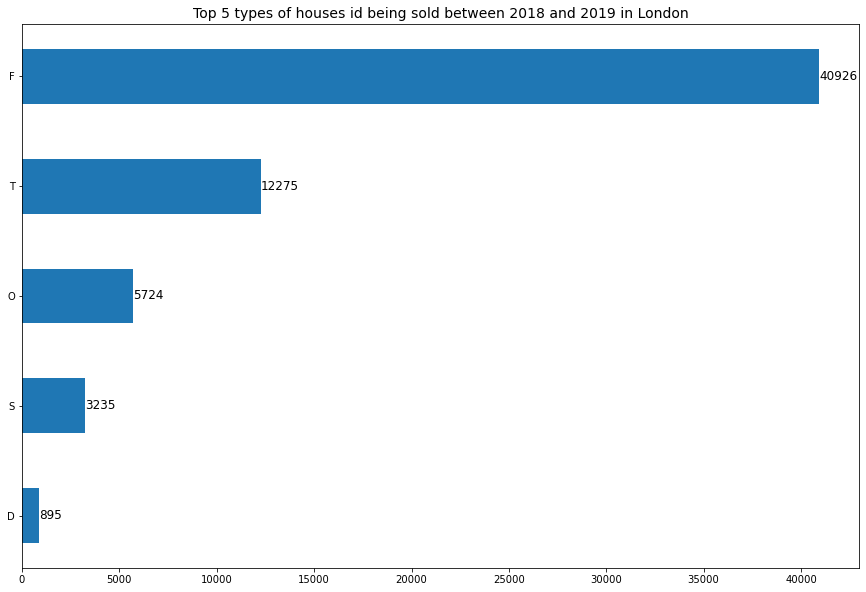

In [ ]:
def top_type(df):
  type_count = df.groupby('type').type.count()
  type_count = type_count.sort_values(ascending=False)
  return type_count.head(10)

top_type = top_type(London_df)

# //plotting
verbar(top_type, title="Top 5 types of houses id being sold between 2018 and 2019 in London")




Analysis
In London, flat is the most popular property type from 2018 to 2019 in this dataset. I was wondering if the flat had had been always popular?


the flat in London always popular from 2018 to 2019


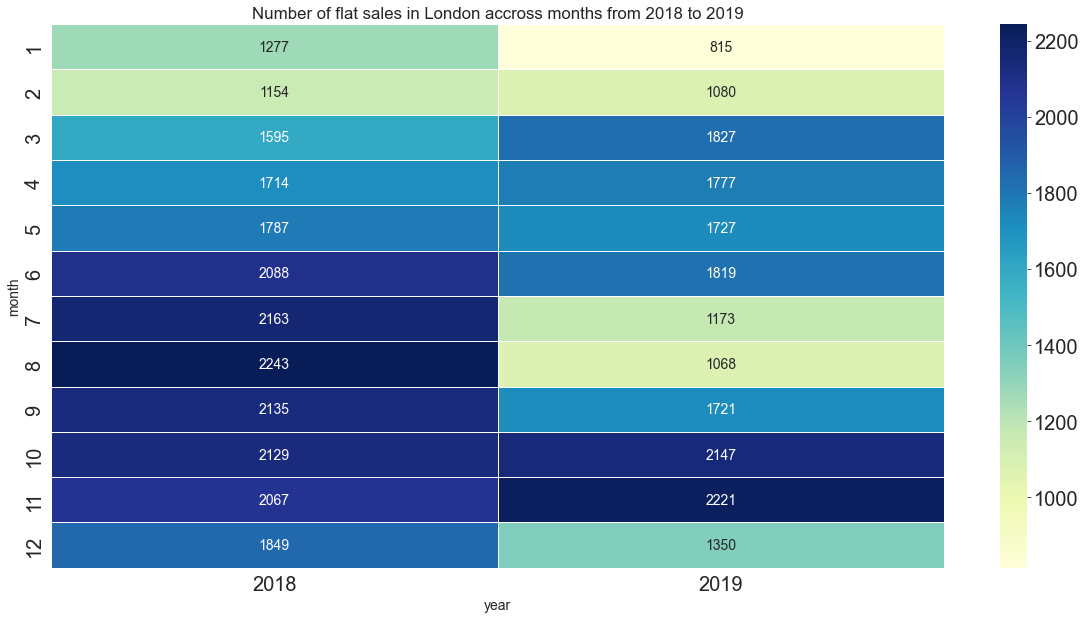

In [ ]:
#Group property type for creating pivot table
tem_df = London_df.groupby(['type','year','month'])['id'].count()
tem_df = tem_df.reset_index()

#Narrow down to the flat type
flat_london = tem_df[tem_df['type'] =='F']
#Create a pivot table
flat_london_pivot = flat_london.pivot('month','year','id')

#Plot setting
sns.set_style("white")
matplotlib.rcParams['font.size'] = 14
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams['figure.figsize'] = (20,10)

# Plot into a heatmap
plt.title("Number of flat sales in London accross months from 2018 to 2019")

sns.heatmap(flat_london_pivot, annot=True, fmt="d",linewidths=.5,cmap="YlGnBu");

Price distribution for London

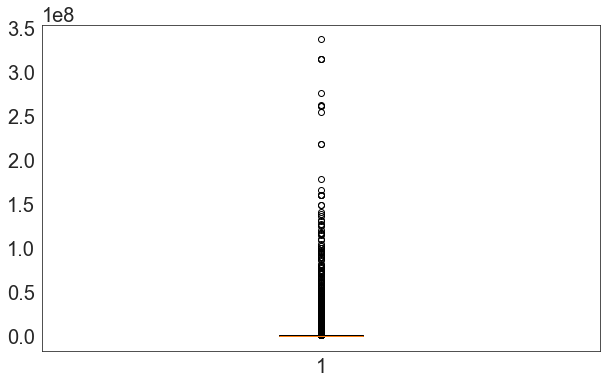

In [ ]:
#boxplot
fig = plt.figure(figsize =(10, 6))
plt.boxplot(London_df['price'],);

Price variations per year for major citys

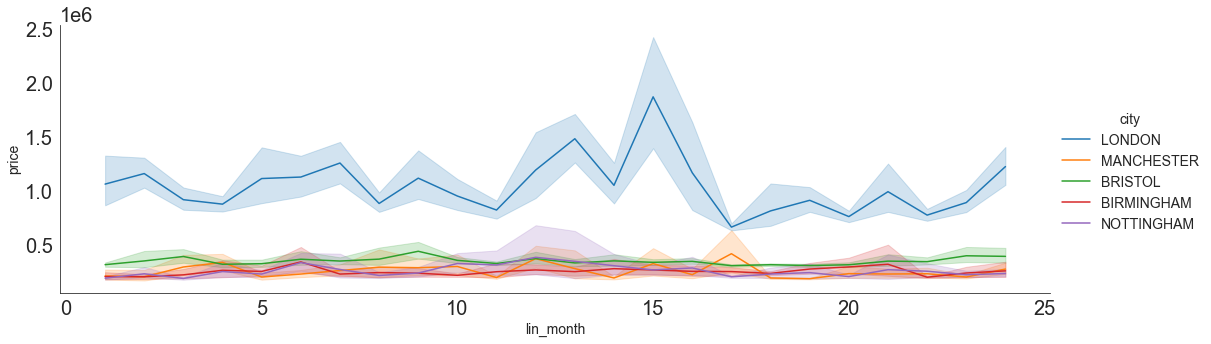

In [ ]:
sns.relplot(kind = 'line', data = merged_cities_df, x = 'lin_month', y = 'price', hue = 'city', aspect = 3);

Transactions distribution per Property Type (D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes) for London

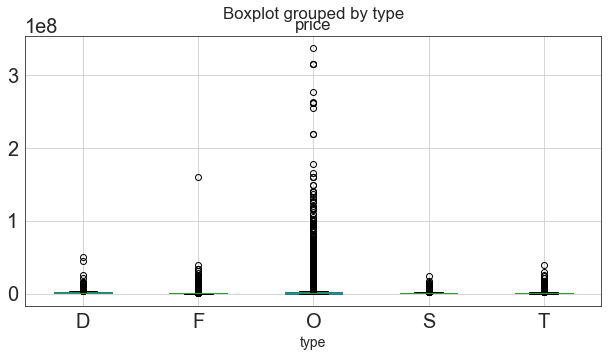

In [ ]:
London_df.boxplot(column = 'price', by = 'type', figsize = (10,5));

[Text(0, 0, 'Freehold'), Text(1, 0, 'Leasehold')]

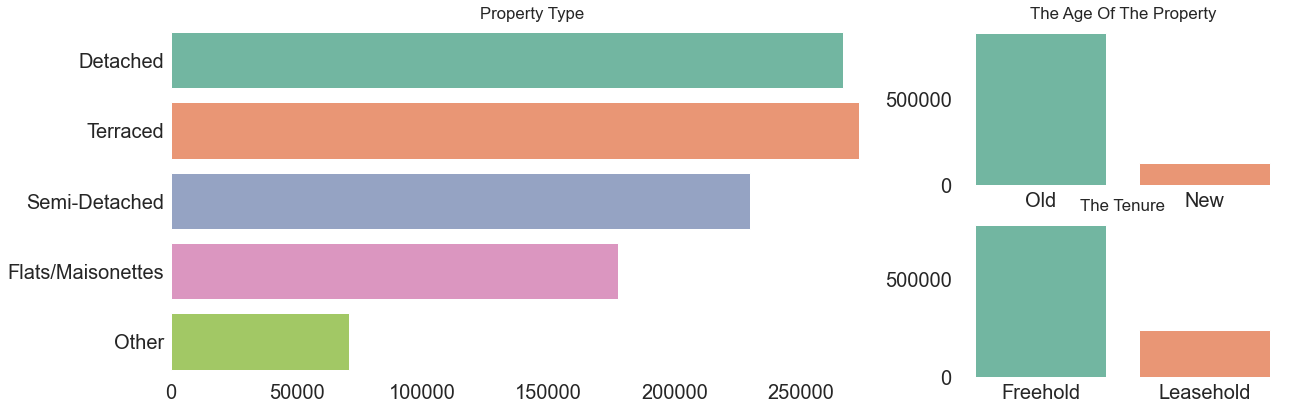

In [ ]:
# -- Descriptive Data 
# Plotting the graphs

fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan=2) # Type
ax2 = plt.subplot2grid((3, 3), (0, 2)) # New
ax3 = plt.subplot2grid((3, 3), (1, 2)) # Duration

# Type : D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other 
sns.countplot(y="type", data=df, ax=ax1, palette="Set2")
sns.despine(left=True, bottom=True)

ax1.set(ylabel="", xlabel="", title="Property Type")
ax1.set_yticklabels(["Detached", "Terraced", "Semi-Detached", "Flats/Maisonettes", "Other"])

# New : 1 = New, 0 = Old 
sns.countplot(x="new", data=df, ax=ax2, palette= "Set2")
sns.despine(left=True, bottom=True)

ax2.set(ylabel="", xlabel="", title="The Age Of The Property")
ax2.set_xticklabels(["Old","New"])

# Duration : F = Freehold, L= Leasehold
sns.countplot(x="duration", data=df, ax=ax3, palette="Set2")
sns.despine(left=True, bottom=True)

ax3.set(ylabel="", xlabel="", title="The Tenure")
ax3.set_xticklabels(["Freehold","Leasehold"])


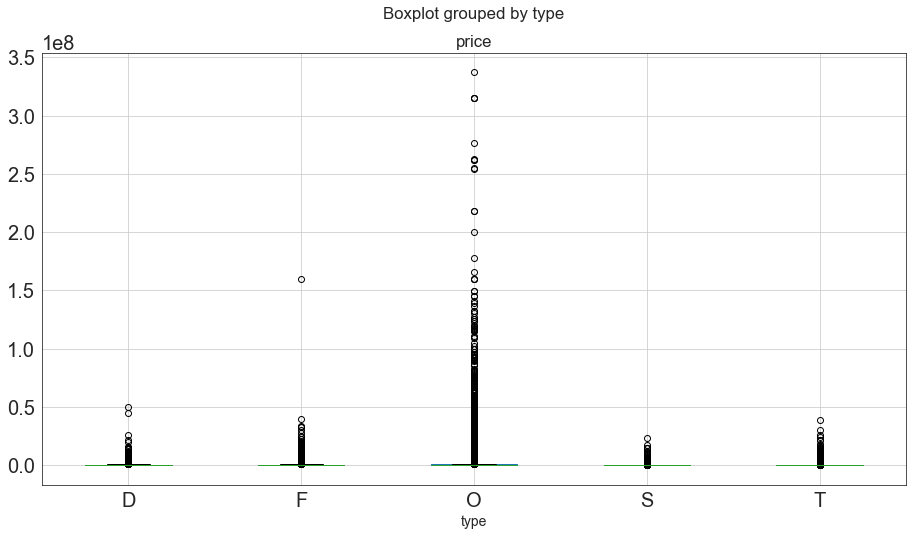

In [ ]:
df.boxplot(column='price', by = 'type', figsize = (15,8));

In [ ]:
# -- Number of newly built
newly_built = df.loc[df["new"] == 'Y', "id"].count()
print(f'Number of newly built properties: {newly_built}')

Number of newly built properties: 129435


In [ ]:
# -- Number of freehold
Number_of_freehold = df.loc[df["duration"] == "F", "id"].count()
print(f'Number of freehold:{Number_of_freehold}')

Number of freehold:777843


In [ ]:
# -- The most expensive transaction
expensive_transaction = df.sort_values("price", ascending=False).iloc[0:3]
expensive_transaction

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,year,month,lin_month
685279,{98C75472-BCE7-72E9-E053-6B04A8C042F0},337000000,2019-04-04,EC4V 5AE,O,N,F,35 - 45,NaN,CARTER LANE,NaN,LONDON,CITY OF LONDON,GREATER LONDON,B,A,2019,4,16
817814,{965B6D92-4C16-95E4-E053-6C04A8C07729},315000000,2019-03-27,SW6 2YA,O,N,F,26 - 30,NaN,MICHAEL ROAD,NaN,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,B,A,2019,3,15
834463,{965B6D92-4BE5-95E4-E053-6C04A8C07729},315000000,2019-03-27,NaN,O,N,F,32,NaN,MICHAEL ROAD,NaN,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,B,A,2019,3,15


In [ ]:
# Number of transactions > 1 000 000 GDP

over = df.loc[df["price"] > 1000000, "id"].count()
print("sales for £1 million:",over)
total = df["id"].count()
percentage = (over/total) * 100
print("Percentage of sales for £1 million:", percentage)

sales for £1 million: 26798
Percentage of sales for £1 million: 2.6312533752270606


Fact of the data:

Between January 2018 and January 2019 :

129,435 were newly built

777,843 were freehold

26,798 sales for £1 million and over (2 percents of the total transactions)


Monthly Analysis

In [ ]:
df_month = df[(df["lin_month"] == 1) | (df["lin_month"] == 24)]

[Text(0, 0.5, 'The Median Price (In GBP)'), Text(0.5, 0, 'January')]

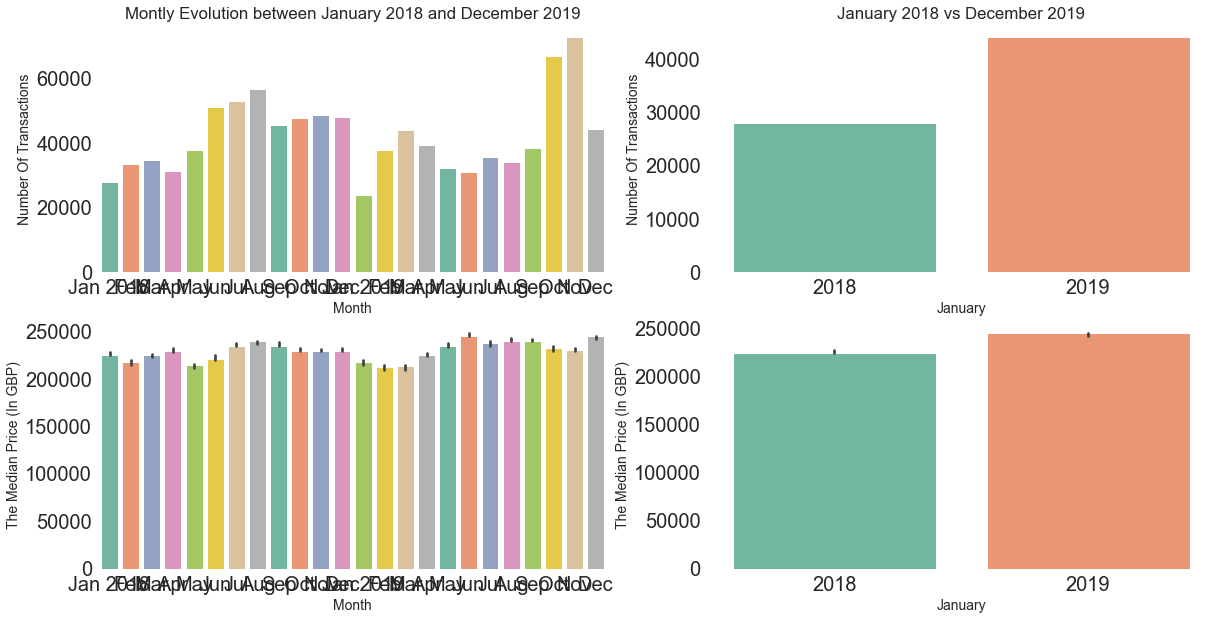

In [ ]:
fig, ((ax1, ax2) , (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

p = sns.countplot(x=df["lin_month"], ax=ax1, palette="Set2")
z = sns.countplot(x=df_month["lin_month"], ax=ax2, palette="Set2")
v = sns.barplot(y=df["price"], x=df["lin_month"], estimator=np.median, ax=ax3, palette= "Set2")
q = sns.barplot(y=df_month["price"], x=df_month["lin_month"], estimator=np.median, ax=ax4, palette= "Set2")

m = ['Jan 2018', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
'Jan 2019','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = ["2018","2019"]
# Add a legend and informative axis label
p.set_xticklabels(m)
z.set_xticklabels(y)
v.set_xticklabels(m)
q.set_xticklabels(y)
sns.despine(left=True, bottom=True)
ax1.set(ylabel="Number Of Transactions", xlabel="Month", title="Montly Evolution between January 2018 and December 2019")
ax2.set(ylabel="Number Of Transactions", xlabel="January", title="January 2018 vs December 2019")
ax3.set(ylabel="The Median Price (In GBP)", xlabel="Month")
ax4.set(ylabel="The Median Price (In GBP)", xlabel="January")

If we compare January 2018 and January 2019, the volume of transactions drops by 58 percent, meanwhile the median price increase a little bit. c

In [ ]:
# -- % of volume variation 
VA = df_month.loc[df_month["lin_month"] == 24, "id"].count()
VD = df_month.loc[df_month["lin_month"] == 1, "id"].count()
VAR  = (VA - VD) / VD
VAR * 100

57.97629248786061

### Are there anywhere more old houses being sold than new houses or more new houses being sold than old houses?

In [ ]:
# Group by them
old_new_df= df.groupby(['year','new'])['id'].count()
tem_df = old_new_df.reset_index()
old_new_df = tem_df.rename(columns={'id':"count"})

# Filter them and select count column
old = old_new_df[old_new_df['new']== 'Y']['count']
new = old_new_df[old_new_df['new']== 'N']['count']
years = np.arange(2018, 2020)

# Constructing bar charts
fig = go.Figure(data = [go.Bar(name='Estabilished residential building',x=years,y=old),
                go.Bar(name="Newly built property",x=years, y=new)]
                               )

fig.update_layout(barmode='group',title='Total number of houses sales by types over years',xaxis=dict(tickmode='linear'))
fig.show()

10. What’s the minimum/maximum price of houses being sold given years

In [ ]:
# Group by data to get max/min price per year
max_by_year = df.groupby('year')['price'].max().reset_index()
min_by_year = df.groupby(['year'])['price'].min().reset_index()

# Find the Maximum and minimum price
max_price = max_by_year['price']
min_price= min_by_year['price']
years = np.arange(2018,2020)

In [ ]:
trace_1 = go.Scatter(x=years, y=max_price, name='Max housing price', line=dict(color = ('royalblue')), mode='lines+markers')

trace_2 = go.Scatter(x=years, y=min_price, name='Min housing price', line=dict(color = ('orange')), mode='lines+markers')

layout_1 = go.Layout(
        height=420,
        width=800,

        title=go.layout.Title(
            text='The maximum and minimum housing prices in the UK over years',
        ),
        xaxis=go.layout.XAxis(
            title='years',
        ),
        yaxis=go.layout.YAxis(
            title='Housing Price(£)',
        )
    )

data = []
trace_3_arr = np.array([])

for i in range(0, len(years)):
  trace_i = go.Scatter(x=[years[i], years[i]], y=[max_price[i], min_price[i]], line=dict(color = ('black'), width=1), showlegend=False)
  trace_3_arr = np.append(trace_3_arr, trace_i)
  data.append(trace_i)


data.append(trace_1)
data.append(trace_2)

fig = go.Figure(data=data, layout=layout_1)
iplot(fig)

Analysis
From the chart, we can see the minimum price couldnot vary. They are £1. However, we see the maximum price reached the highest point of £337 million.

Analyisi says compare to 2018, 2019 both types of house sales decressed 

Counties And Cities Analysis

Top 10 Counties and Top 10 Cities

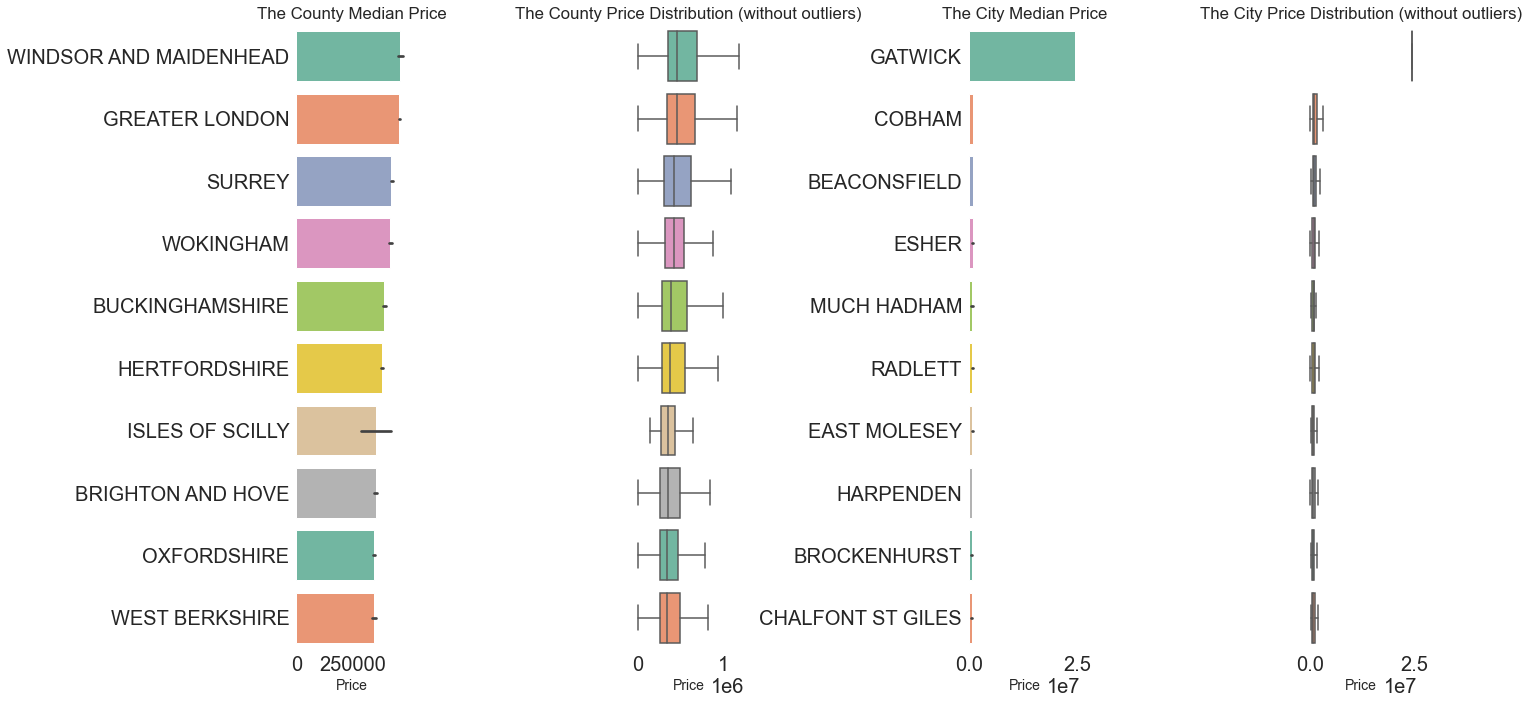

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
# Data
my_order = df.groupby("county").median().sort_values("price", ascending=False).iloc[0:10].index
my_order2 = df.groupby("city").median().sort_values("price", ascending=False).iloc[0:10].index

# Plots
c1 = sns.barplot(y="county", x="price", data=df, order=my_order, palette= "Set2", estimator=np.median, ax=axes[0])
c2 = sns.boxplot(y="county", x="price", data=df, order=my_order, palette= "Set2", showfliers=False, ax=axes[1])
c3 = sns.barplot(y="city", x="price", data=df, order=my_order2, palette=  "Set2", estimator=np.median, ax=axes[2])
c4 = sns.boxplot(y="city", x="price", data=df, order=my_order2, palette=  "Set2", showfliers=False, ax=axes[3])

# Labels
c1.set_yticklabels(c1.get_yticklabels())
c2.set_yticklabels("")
c3.set_yticklabels(c3.get_yticklabels())
c4.set_yticklabels("")

# Axis
axes[0].set(ylabel="", xlabel="Price", title="The County Median Price")
axes[1].set(ylabel="", xlabel="Price", title="The County Price Distribution (without outliers)")
axes[2].set(ylabel="", xlabel="Price", title="The City Median Price")
axes[3].set(ylabel="", xlabel="Price", title="The City Price Distribution (without outliers)")

sns.despine(left=True, bottom=True)
plt.tight_layout()


Localities Based on the number of real estate related transactions

There are 1146 cities or towns in this dataset
Localities Based real estate related transactions : AxesSubplot(0.125,0.125;0.775x0.755)


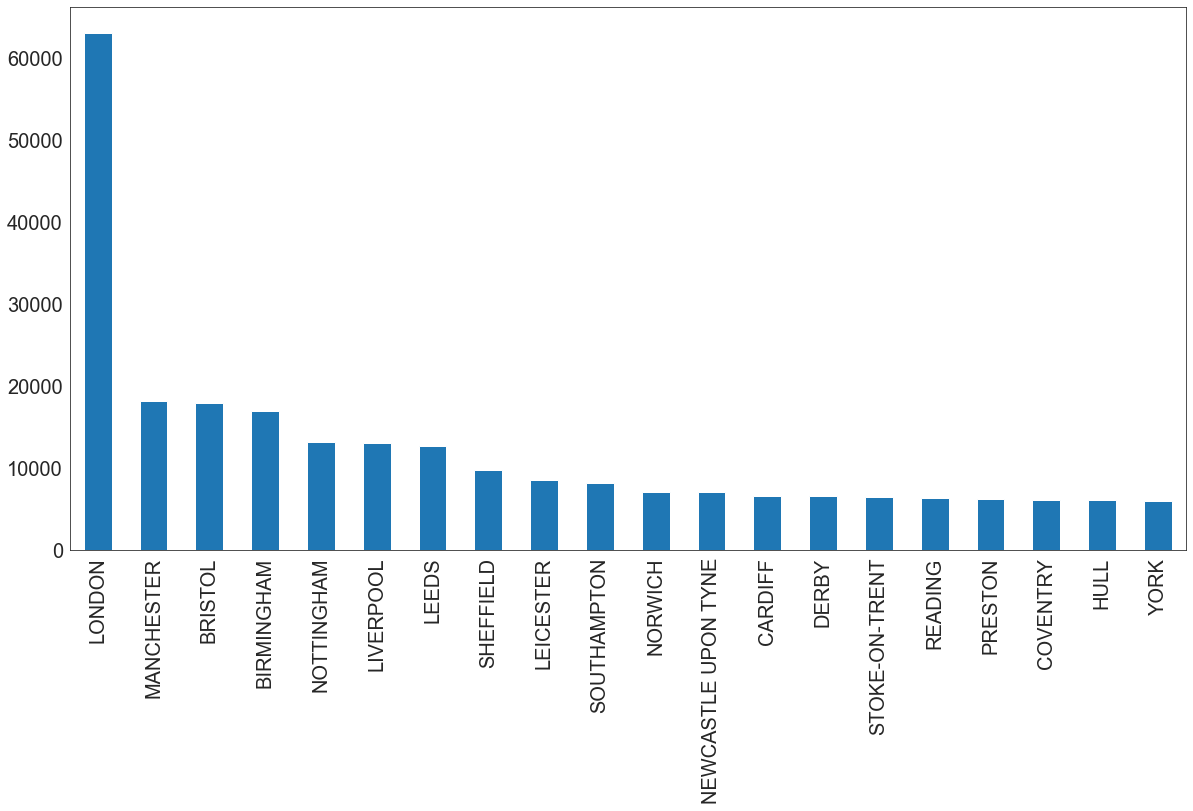

In [ ]:
city = df['city'].unique()
print("There are {} cities or towns in this dataset".format(len(city)))
tarn= df['city'].value_counts()[:20].plot(kind="bar")
print("Localities Based real estate related transactions :",tarn)

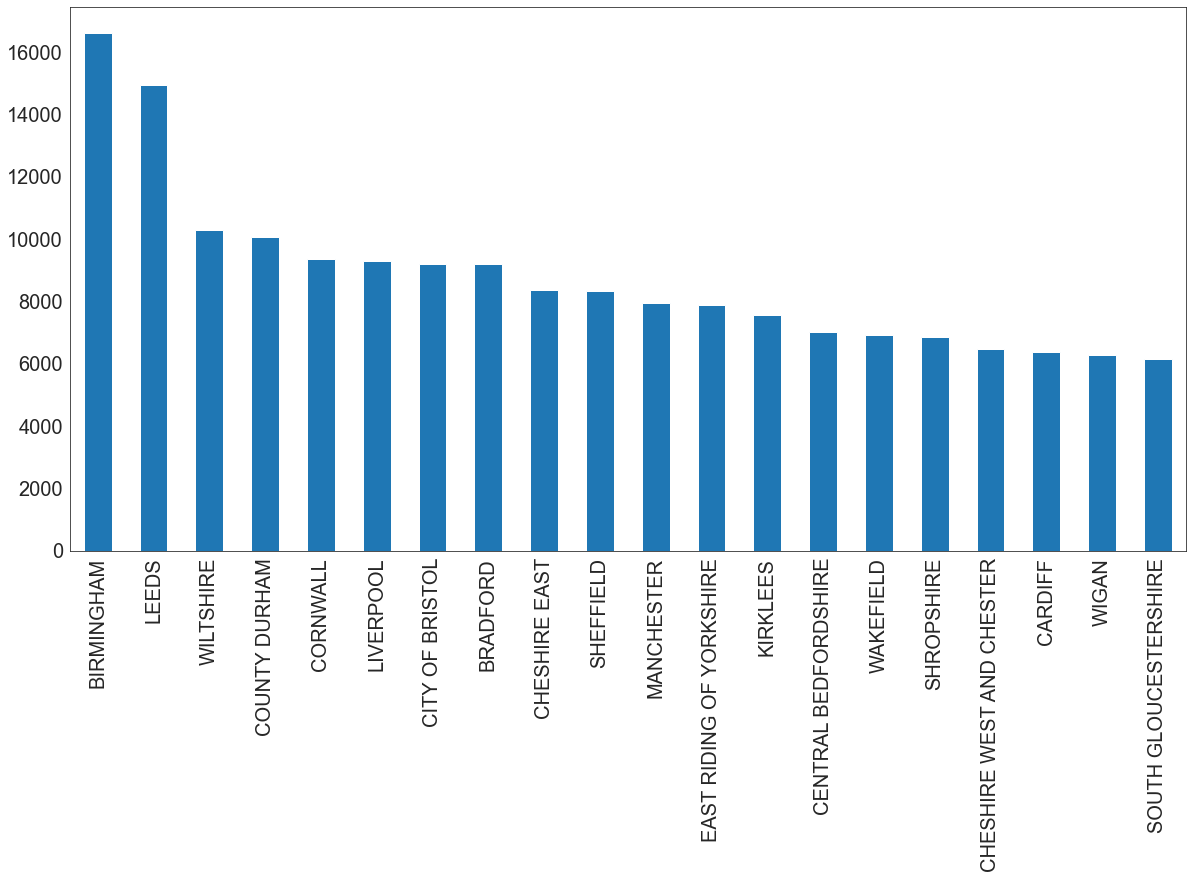

In [ ]:
df['district'].value_counts()[:20].plot(kind="bar");

Top 20 most valued Towns on basis of investments done

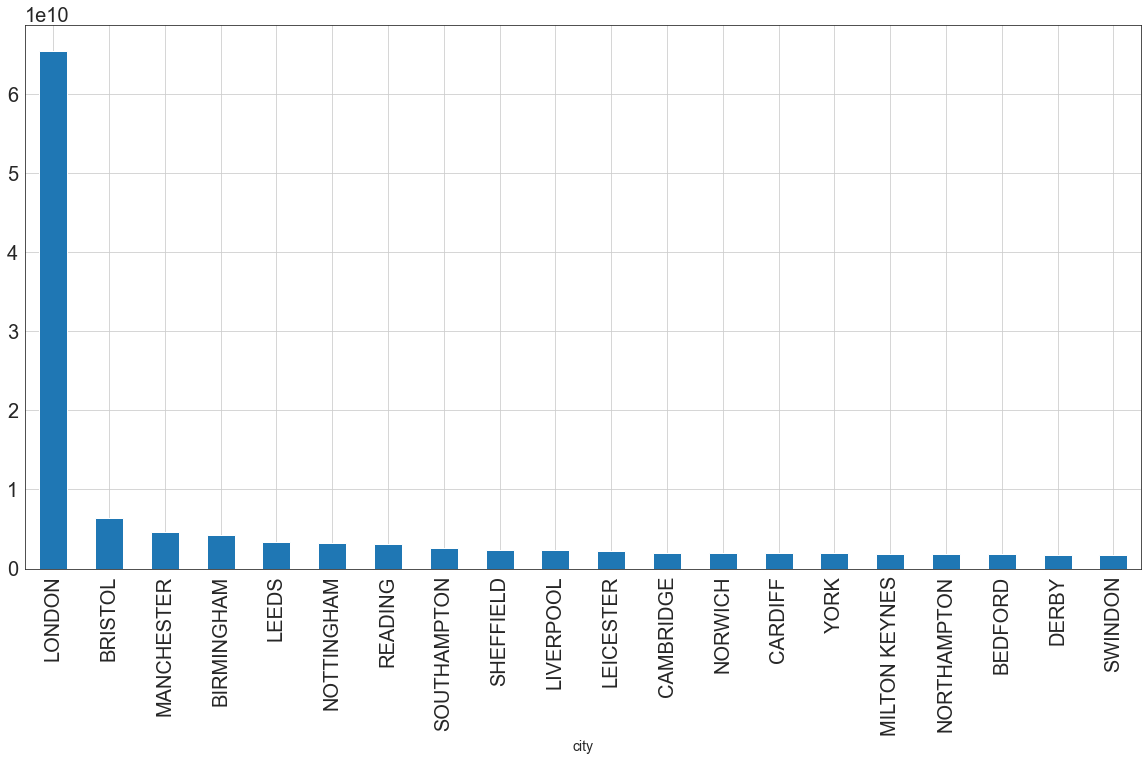

In [ ]:
df.groupby(df['city'])['price'].sum().sort_values(ascending=False)[:20].plot(kind="bar",grid=True);

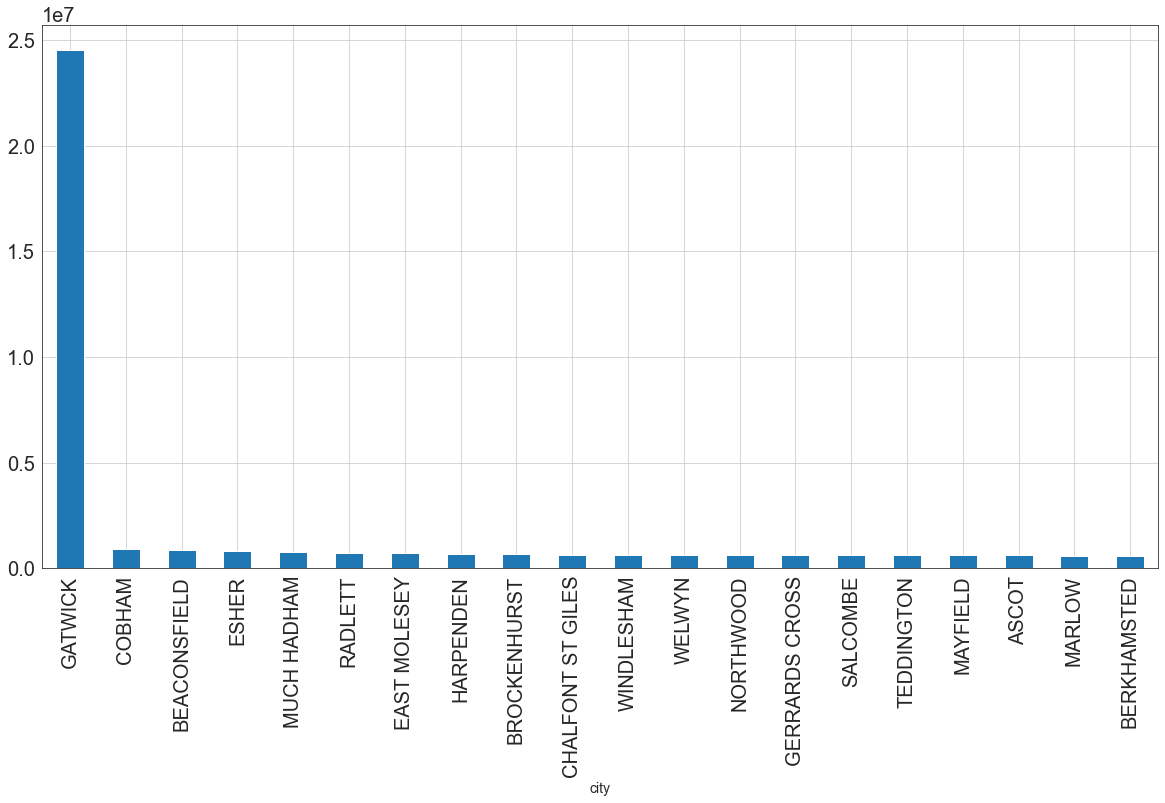

In [ ]:
df.groupby(df['city'])['price'].median().sort_values(ascending=False)[:20].plot(kind="bar",grid=True);

Top 20 most valued Towns based on 'NEW' investments done

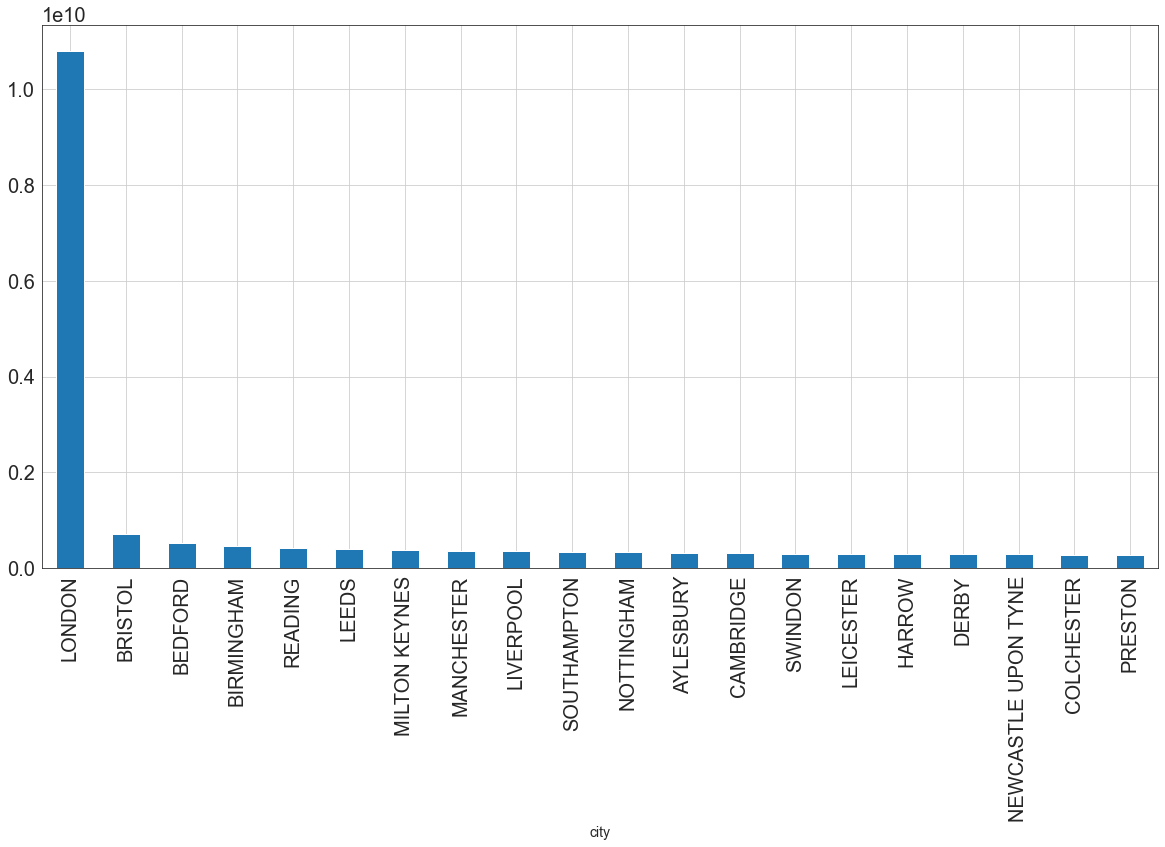

In [ ]:
# Y = a newly built property, N = an established residential building

ndf = df[df['new']== 'Y']#new properties
ndf.groupby(ndf['city'])['price'].sum().sort_values(ascending=False)[:20].plot(kind="bar",grid=True);

Promising towns where maximum number of new investements were done in 2018 and 2019

In [ ]:
TownS = ndf['city'].value_counts()[:50]
TownS[TownS>100]

LONDON                 13691
LIVERPOOL               2554
BRISTOL                 2254
BIRMINGHAM              2094
MANCHESTER              1867
BEDFORD                 1527
NOTTINGHAM              1403
LEEDS                   1288
NEWCASTLE UPON TYNE     1230
PRESTON                 1221
SOUTHAMPTON             1139
SALFORD                 1112
DERBY                   1106
NORWICH                 1027
MILTON KEYNES           1024
LEICESTER               1005
READING                  995
SHEFFIELD                959
SWINDON                  911
COLCHESTER               873
AYLESBURY                813
DONCASTER                770
PETERBOROUGH             758
CARDIFF                  752
BASINGSTOKE              729
HULL                     710
TELFORD                  710
RUGBY                    704
HARROW                   702
CAMBRIDGE                680
BRADFORD                 675
EXETER                   669
STOKE-ON-TRENT           666
YORK                     664
SHREWSBURY    

## The Median Price

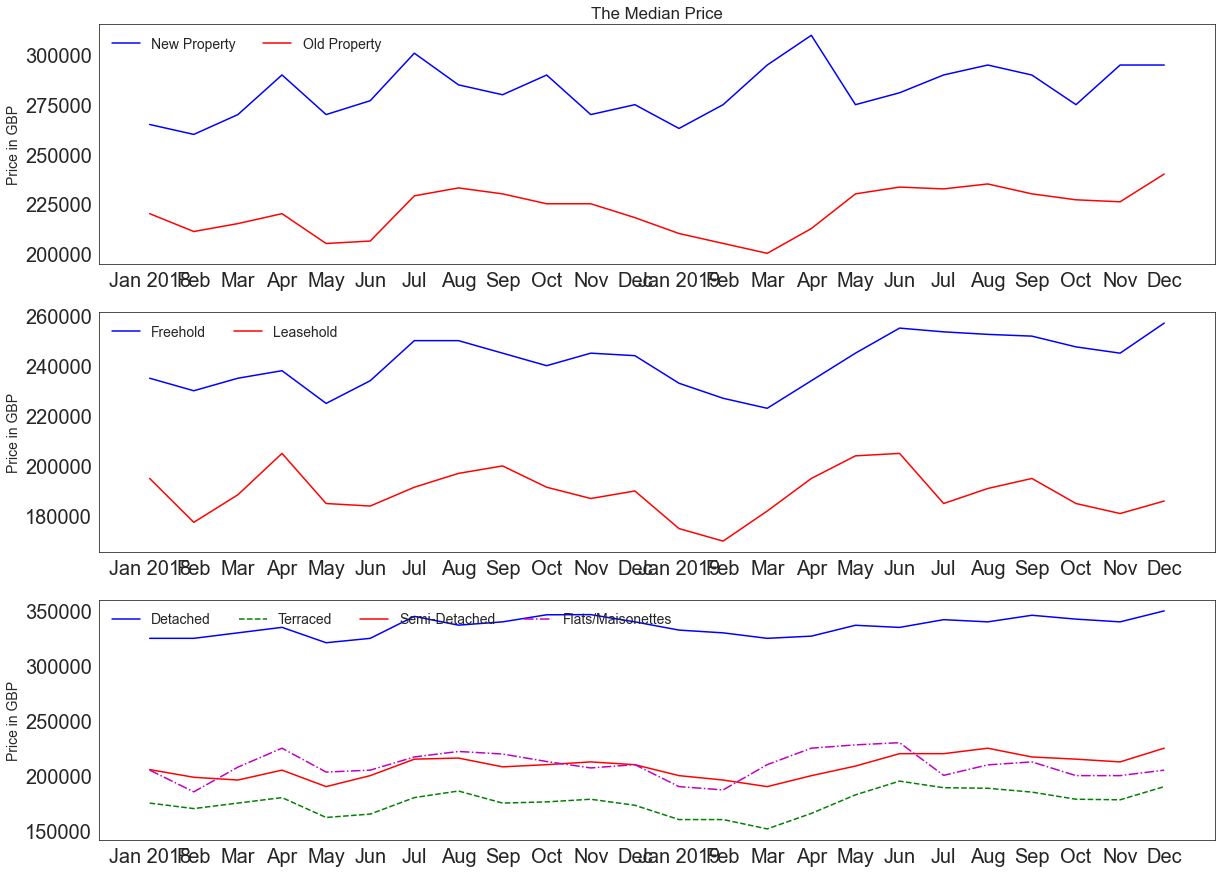

In [ ]:
fig = plt.figure(figsize=(20, 15))

# The Median Price by the age of the property
price_median_new = df[df["new"] == 'Y'].groupby("lin_month").price.median()
price_median_old = df[df["new"] == 'N'].groupby("lin_month").price.median()

ax4 = plt.subplot2grid((3, 3), (0, 0), colspan=3) # The Median Price by Age of Property
plt.xticks(price_median_new.index)

m = ['Jan 2018', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
'Jan 2019','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax4.plot(price_median_new, "b-", label="New Property")
ax4.plot(price_median_old, "r-", label="Old Property")
ax4.set(ylabel="Price in GBP", xlabel="", title="The Median Price")
ax4.set_xticklabels(m)
ax4.legend(ncol=2, loc="upper left", frameon=False)

# The Median Price by Tenure
price_median_f = df[df["duration"] == "F"].groupby("lin_month").price.median()
price_median_l = df[df["duration"] == "L"].groupby("lin_month").price.median()

ax5 = plt.subplot2grid((3, 3), (1, 0), colspan=3) # The Median Price by Tenure
plt.xticks(price_median_f.index)

ax5.plot(price_median_f, "b-", label="Freehold")
ax5.plot(price_median_l, "r-", label="Leasehold")
ax5.set(ylabel="Price in GBP", xlabel="", title="")
ax5.set_xticklabels(m)
ax5.legend(ncol=2, loc="upper left", frameon=False)

# The Median Price by Type
price_median_d = df[df["type"] == "D"].groupby("lin_month").price.median()
price_median_t = df[df["type"] == "T"].groupby("lin_month").price.median()
price_median_sd = df[df["type"] == "S"].groupby("lin_month").price.median()
price_median_fm = df[df["type"] == "F"].groupby("lin_month").price.median()

ax6 = plt.subplot2grid((3, 3), (2, 0), colspan=3) # The Median Price by Type
plt.xticks(price_median_d.index)

ax6.plot(price_median_d, "b-", label="Detached")
ax6.plot(price_median_t, "g--", label="Terraced")
ax6.plot(price_median_sd, "r-", label="Semi-Detached")
ax6.plot(price_median_fm, "m-.", label="Flats/Maisonettes")

ax6.set(ylabel="Price in GBP", xlabel="", title="")
ax6.set_xticklabels(m)
ax6.legend(ncol=5, loc="upper left", frameon=False)

1. The median price is higher for new properties than for the old ones.

2. As we might think, leasehold properties are cheaper than freehold properties.

3. The detached properties are much more expensive than the other types.

In [ ]:
# // save df as a csv
df.to_csv('df.csv')